# Import 

In [1]:
# 3d library
import open3d as o3d

In [2]:
# image elaboration libraries

#!pip install Pillow 
#!pip install imageio
#!pip install cv2-plt-imshow

from imageio import imread
from imageio import imwrite
from PIL import Image

import cv2
import matplotlib.pyplot as plt
from cv2_plt_imshow import cv2_plt_imshow, plt_format

In [3]:
# others
import numpy as np
import os
import random as myrand

from tqdm.notebook import tqdm# progress bar
import sys
from time import time 
import copy

In [4]:
delimiter = ', ' 
myrand.seed(42)
dash = '-'*80

# os and directories

In [5]:
from sys import platform
platform

'darwin'

In [93]:
#os.chdir('/Users/ariannataormina/Documents/GitHub/02507-Project_work_Image_Analysis_and_Computer_Graphics/')
cwd = os.getcwd()
cwd

'/Users/ariannataormina/Documents/GitHub/02507-Project_work_Image_Analysis_and_Computer_Graphics/data'

In [7]:
if platform == "linux" or platform == "linux2":
    # linux
    print ("linux to be implemented")
elif platform == "darwin":
    # OS X
    ROOT= cwd +"/data" #mac
    os.chdir(ROOT)
    os.listdir(ROOT)
    !ls {ROOT}
elif platform == "win32":
    # Windows
    ROOT='ARI_HD:\\' #w10
    os.chdir(ROOT)
    os.listdir(ROOT)
    !dir {ROOT} 

imgfolder plyfolder readme


In [8]:
img_folder = ROOT +"/imgfolder"
ply_folder = ROOT +"/plyfolder"

In [9]:
!ls {img_folder}

image0.png  image05.png image10.png image15.png image20.png image25.png
image01.png image06.png image11.png image16.png image21.png image26.png
image02.png image07.png image12.png image17.png image22.png image27.png
image03.png image08.png image13.png image18.png image23.png image28.png
image04.png image09.png image14.png image19.png image24.png image29.png


In [10]:
!ls {ply_folder}

points0.ply  points05.ply points10.ply points15.ply points20.ply points25.ply
points01.ply points06.ply points11.ply points16.ply points21.ply points26.ply
points02.ply points07.ply points12.ply points17.ply points22.ply points27.ply
points03.ply points08.ply points13.ply points18.ply points23.ply points28.ply
points04.ply points09.ply points14.ply points19.ply points24.ply points29.ply


In [11]:
all_images = sorted(os.listdir(img_folder))
all_ply = sorted(os.listdir(ply_folder))

In [12]:
all_paths_images = [img_folder+"/"+all_images[idx] for idx in range(len(all_images))]
all_paths_ply = [ply_folder+"/"+all_ply[idx] for idx in range(len(all_ply))]

In [13]:
img_folder+"/"+all_images[0]

'/Users/ariannataormina/Documents/GitHub/02507-Project_work_Image_Analysis_and_Computer_Graphics/data/imgfolder/image0.png'

# Sort sequences appropriately

Given the initial 10 teeth: 
- external images are sorted as 0 to 9
- internal images are sorted as 9 to 0
- upper images are sorted as 0 to 9

need to reverse the order of internal images and ply


In [14]:
num_teeth = 10
external_img = [cv2.imread(path) for path in all_paths_images[:num_teeth]]
internal_img = [cv2.imread(path) for path in all_paths_images[num_teeth:2*num_teeth]]
upper_img = [cv2.imread(path) for path in all_paths_images[-num_teeth:]]

In [15]:
# reverse in place the internal ones
internal_img.reverse()

# plot tooth

In [16]:
t = 0

In [17]:
def display_one_tooth(images, toothnum = 0, rows = 1, cols=3, print_suptitle = False, mysuptitle = ""):
    fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(30, 30))
    for i in range(rows):
        for j in range(cols):
            axes[i][j].imshow(plt_format(images[j]))
            #axes[i][j].set_xlabel("tooth_{}".format(toothnum))
            #axes[i][j].axis('off')
    
    cols_title = ['{} View'.format(col) for col in ['External', 'Internal', 'Upper']]
    for ax, c in zip(axes[0], cols_title):
        ax.set_title(c, rotation=0, fontsize=40)
        
    rows_title = ["Tooth_{}             ".format(toothnum)]
    for ax, r in zip(axes[:,0], rows_title):
        ax.set_ylabel(r, rotation=0, fontsize=40)
        
    if print_suptitle == True:
        fig.suptitle("{}".format(mysuptitle),fontsize=40)
    
    fig.tight_layout()    
    plt.show()

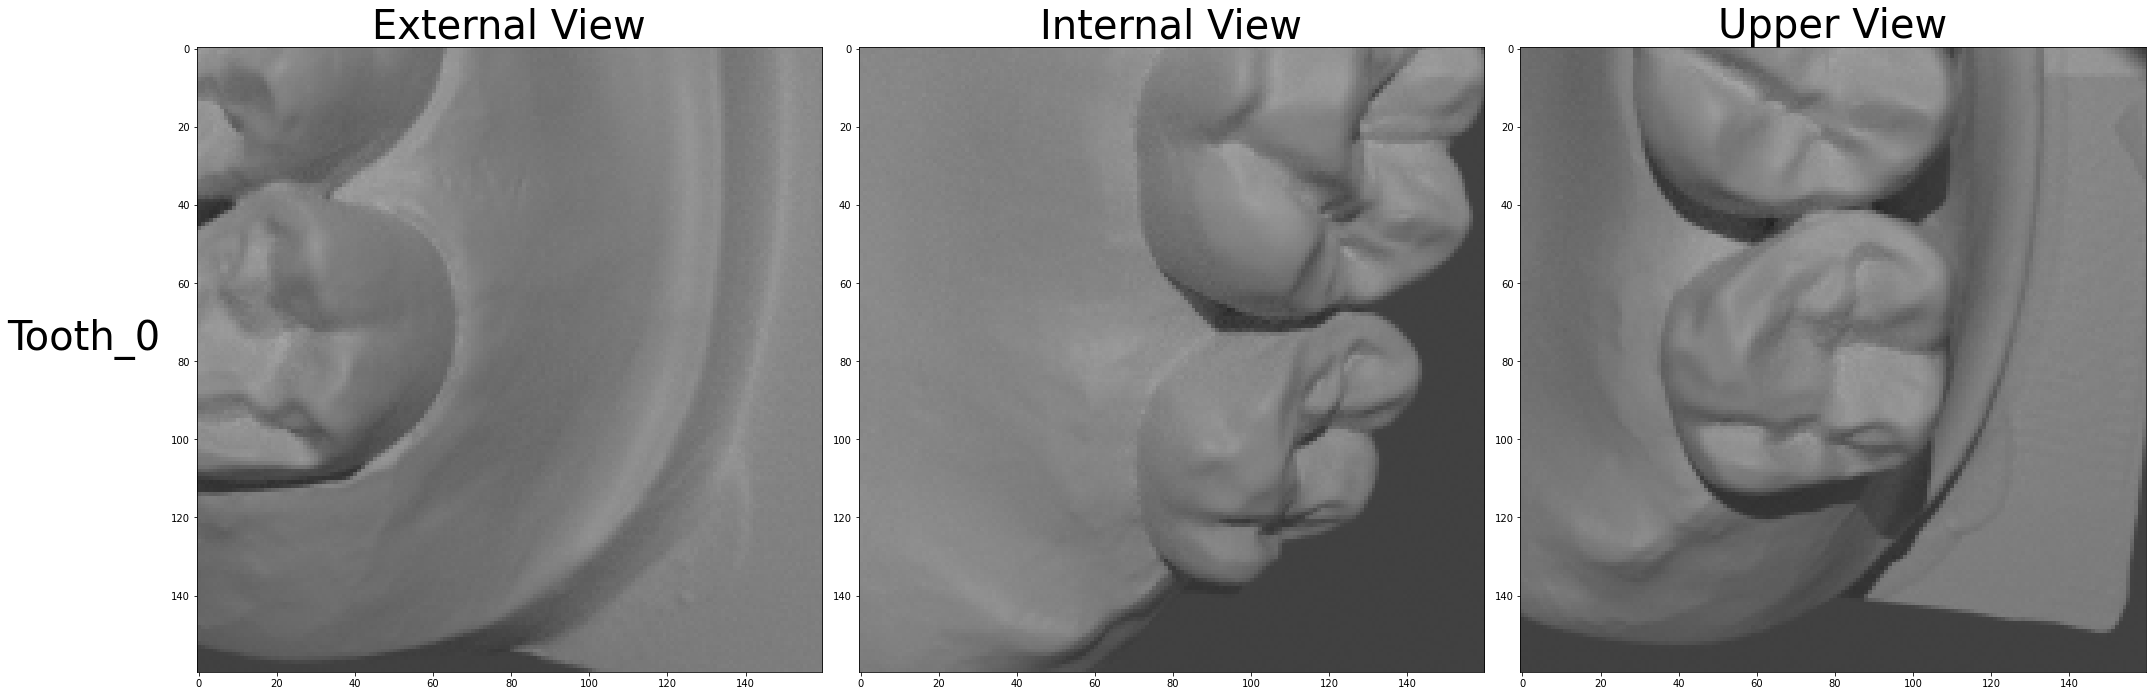

In [19]:
one_tooth_images= [external_img[t],internal_img[t],upper_img[t]]
display_one_tooth(one_tooth_images,toothnum = t, rows = 1, cols=len(one_tooth_images))


# plot multiple teeth

In [20]:
def display_multiple_teeth(images, T, rows = 1, cols=3, print_suptitle = False, mysuptitle = ""):
    
    fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(30, 30))
    for i in range(rows):
        for j in range(cols):
            axes[i][j].imshow(plt_format(images[j][i]))
            #axes[i][j].set_xlabel("tooth_{}".format(toothnum))
            #axes[i][j].axis('off')
    
    cols_title = ['{} View'.format(col) for col in ['External', 'Internal', 'Upper']]
    for ax, c in zip(axes[0], cols_title):
        ax.set_title(c, rotation=0, fontsize=40)
        
    rows_title = ["Tooth_{}             ".format(toothnum) for toothnum in list(range(T[0],T[1]))]
    for ax, r in zip(axes[:,0], rows_title):
        ax.set_ylabel(r, rotation=0, fontsize=40)
        
    if print_suptitle == True:
        fig.suptitle("{}".format(mysuptitle),fontsize=40)
    
    fig.tight_layout()    
    plt.show()

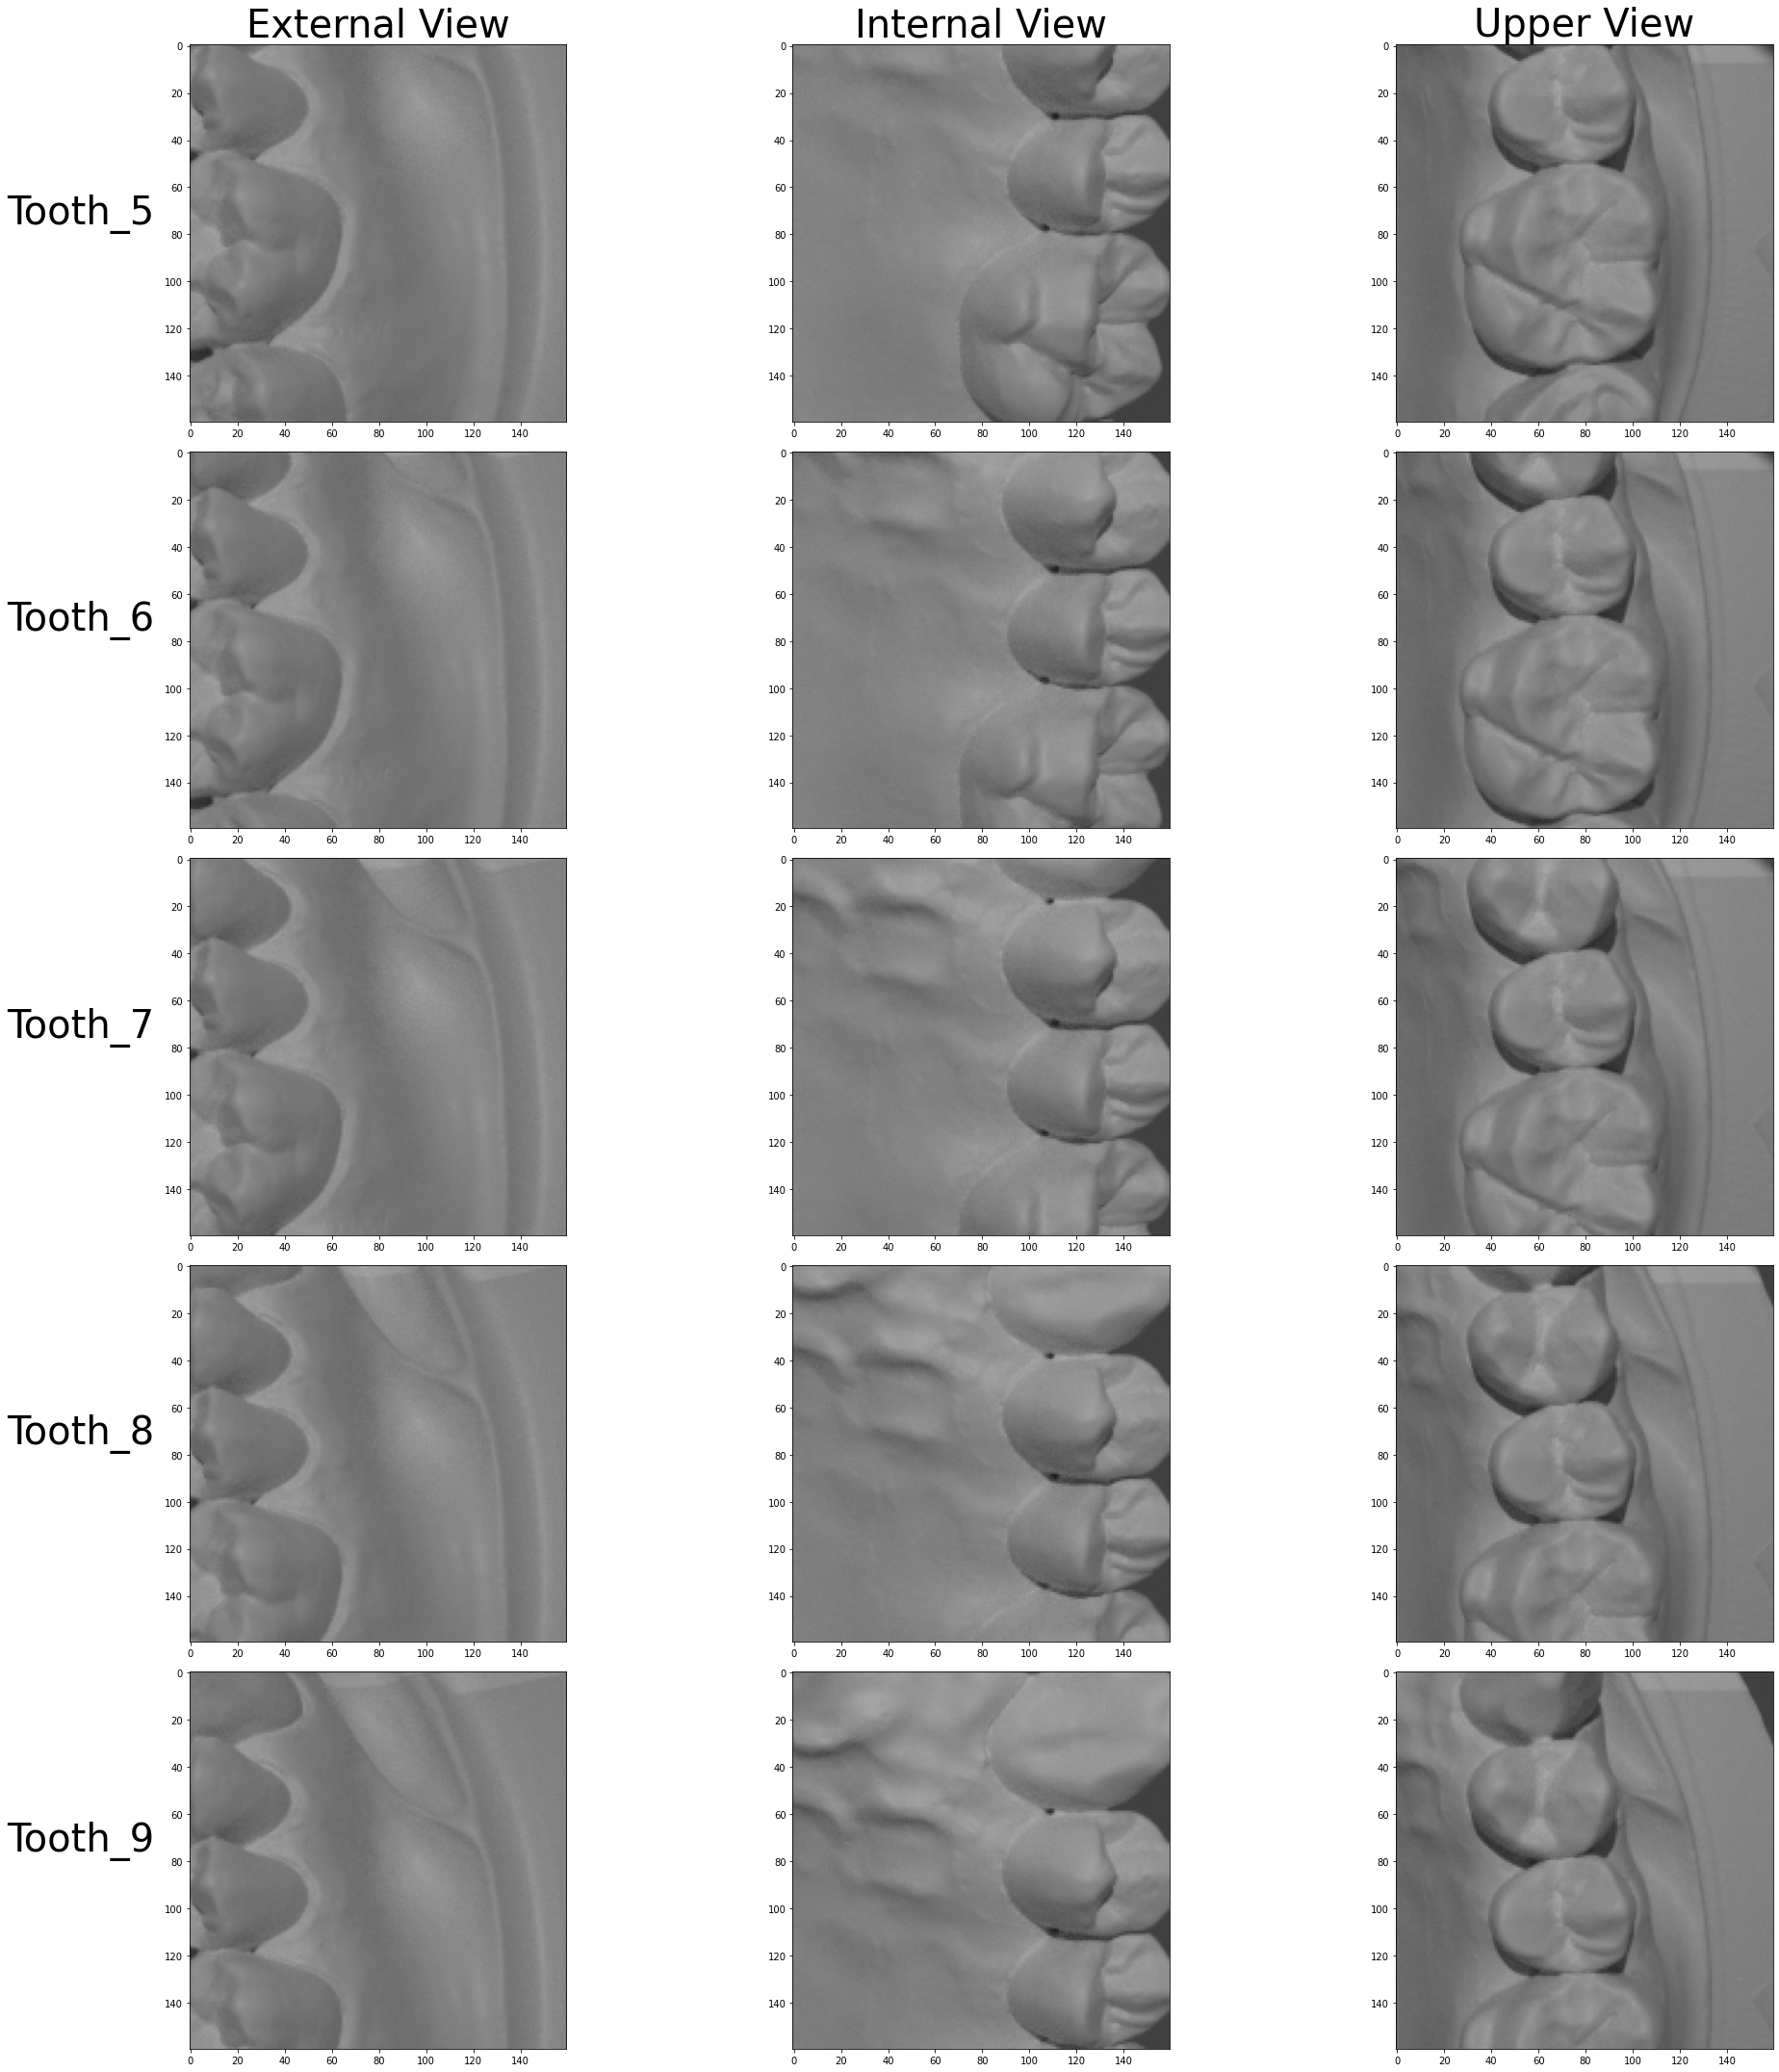

In [23]:
T = (5,10) # visualizing teeth from 5 to 9 
many_images= [external_img[T[0]:T[1]], internal_img[T[0]:T[1]], upper_img[T[0]:T[1]]] 
display_multiple_teeth(many_images,T, rows = len(external_img[T[0]:T[1]]), cols=len(many_images))

# Load Point Clouds

## how many point clouds per each one?

In [24]:
number_columns = 3
number_rows = 10

for i in range(number_columns):
    for j in range(number_rows):
        myindex = ((i)*10+j)
        path = ply_folder+"/"+all_ply[myindex]
        pcd = o3d.io.read_point_cloud(path)
        print ('T_%s %s'%(myindex, pcd))
        ## uncomment to visualize all the coordinates
        #print (np.asarray(pcd.points))


T_0 PointCloud with 24775 points.
T_1 PointCloud with 25350 points.
T_2 PointCloud with 25371 points.
T_3 PointCloud with 25508 points.
T_4 PointCloud with 25547 points.
T_5 PointCloud with 25545 points.
T_6 PointCloud with 25549 points.
T_7 PointCloud with 25591 points.
T_8 PointCloud with 25590 points.
T_9 PointCloud with 25590 points.
T_10 PointCloud with 24983 points.
T_11 PointCloud with 24896 points.
T_12 PointCloud with 24805 points.
T_13 PointCloud with 24995 points.
T_14 PointCloud with 24714 points.
T_15 PointCloud with 24289 points.
T_16 PointCloud with 23923 points.
T_17 PointCloud with 23258 points.
T_18 PointCloud with 22204 points.
T_19 PointCloud with 20619 points.
T_20 PointCloud with 22217 points.
T_21 PointCloud with 24173 points.
T_22 PointCloud with 24667 points.
T_23 PointCloud with 25044 points.
T_24 PointCloud with 25115 points.
T_25 PointCloud with 25123 points.
T_26 PointCloud with 24966 points.
T_27 PointCloud with 25156 points.
T_28 PointCloud with 25036 poi

### load one point cloud 

In [26]:
#load one point cloud 
path = ply_folder+"/"+all_ply[20]
pcd = o3d.io.read_point_cloud(path)
print(pcd)
print(np.asarray(pcd.points))

PointCloud with 22217 points.
[[-10.407411 -10.407411  53.099034]
 [-10.271841 -10.401864  53.070736]
 [-10.138216 -10.39817   53.051888]
 ...
 [  3.092426  10.621811  54.878902]
 [  3.226965  10.622094  54.880359]
 [  3.361356  10.621886  54.879286]]


### visualize point cloud

In [28]:
### visualize point cloud- opens a pop up window
o3d.visualization.draw_geometries([pcd])

### TODO : is it possible to plot multiple windows at once? 

##  Stitching two adjacent Point Clouds

of course there must be enought overlapping for the algorithm to work

In [66]:
#Read to test ply point clouds
source = o3d.io.read_point_cloud(ply_folder+"/"+all_ply[20])  #source is the point cloud that needs to be registered
target = o3d.io.read_point_cloud(ply_folder+"/"+all_ply[19])  #target is the target point cloud

# Use different colors on the two point clouds
source.paint_uniform_color([1, 0.706, 0])    #source is yellow
target.paint_uniform_color([0, 0.651, 0.929])#target is blue

PointCloud with 20619 points.

In [67]:
# visualize
o3d.visualization.draw_geometries([source,target])

### Outlier removal

using o3d.geometry.radius_outlier_removal.

This function uses the sphere to determine an outlier. 
It needs two parameters: nb_points and radius. 

It will draw a sphere with radius radius for each point in the point cloud: if the number of other points in this sphere is less than nb_points, this algorithm will judge this point as outlier and delete it.



In [68]:
#this
#Outlier removal for two point clouds separately
processed_source, outlier_index = source.remove_radius_outlier(
                                              nb_points=16,
                                              radius=0.4)

processed_target, outlier_index = target.remove_radius_outlier(
                                              nb_points=16,
                                              radius=0.5)

In [69]:
# visualize
o3d.visualization.draw_geometries([processed_source,processed_target])

### Preprocess point cloud

In [70]:
def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target_temp])

In [71]:
def preprocess_point_cloud(pcd, voxel_size):
    print(":: Downsample with a voxel size %.3f." % voxel_size)
    pcd_down = pcd.voxel_down_sample(voxel_size)

    radius_normal = voxel_size * 2
    print(":: Estimate normal with search radius %.3f." % radius_normal)
    pcd_down.estimate_normals(
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=30))

    radius_feature = voxel_size * 5
    print(":: Compute FPFH feature with search radius %.3f." % radius_feature)
    pcd_fpfh = o3d.pipelines.registration.compute_fpfh_feature(
        pcd_down,
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_feature, max_nn=100))
    return pcd_down, pcd_fpfh

In [72]:
def prepare_dataset(source,target,voxel_size):
    trans_init = np.asarray([[0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0],
                             [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0]])
    source.transform(trans_init)
    draw_registration_result(source, target, np.identity(4))

    source_down, source_fpfh = preprocess_point_cloud(source, voxel_size)
    target_down, target_fpfh = preprocess_point_cloud(target, voxel_size)
    return source, target, source_down, target_down, source_fpfh, target_fpfh

### processed source

In [73]:
#this
voxel_size = 0.1 # means 5cm for this dataset

# note: here we are re-defining the source and target as processed 
source, target, source_down, target_down, source_fpfh, target_fpfh = prepare_dataset(processed_source,processed_target,voxel_size)

:: Downsample with a voxel size 0.100.
:: Estimate normal with search radius 0.200.
:: Compute FPFH feature with search radius 0.500.
:: Downsample with a voxel size 0.100.
:: Estimate normal with search radius 0.200.
:: Compute FPFH feature with search radius 0.500.


### Global registration 

To get initialization of transformation matrix

In [74]:
#http://www.open3d.org/docs/release/tutorial/pipelines/global_registration.html
def execute_global_registration(source_down, target_down, source_fpfh,
                                target_fpfh, voxel_size):
    distance_threshold = voxel_size *1.5
    print(":: RANSAC registration on downsampled point clouds.")
    print("   Since the downsampling voxel size is %.3f," % voxel_size)
    print("   we use a liberal distance threshold %.3f." % distance_threshold)
    result = o3d.pipelines.registration.registration_ransac_based_on_feature_matching(
        source_down, target_down, source_fpfh, target_fpfh, True,
        distance_threshold,
        o3d.pipelines.registration.TransformationEstimationPointToPoint(False),
        3, [
            o3d.pipelines.registration.CorrespondenceCheckerBasedOnEdgeLength(
                0.9),
            o3d.pipelines.registration.CorrespondenceCheckerBasedOnDistance(
                distance_threshold)
        ], o3d.pipelines.registration.RANSACConvergenceCriteria(1000000, 0.999))
    return result

In [75]:
#execute ransac
result_ransac = execute_global_registration(source_down, target_down,
                                            source_fpfh, target_fpfh,
                                            voxel_size)
print(result_ransac)

threshold = 0.01
trans_init = result_ransac.transformation
draw_registration_result(source, target, trans_init)

:: RANSAC registration on downsampled point clouds.
   Since the downsampling voxel size is 0.100,
   we use a liberal distance threshold 0.150.
RegistrationResult with fitness=1.560549e-03, inlier_rmse=7.974719e-02, and correspondence_set size of 5
Access transformation to get result.


### Refined result

#ref :http://www.open3d.org/docs/release/python_api/open3d.geometry.KDTreeSearchParamHybrid.html

propertymax_nn
At maximum, max_nn neighbors will be searched.

In [79]:
#icp
def refine_registration(source, target, source_fpfh, target_fpfh, voxel_size):
    
    distance_threshold = voxel_size 
    print(":: Point-to-plane ICP registration is applied on original point")
    print("   clouds to refine the alignment. This time we use a strict")
    print("   distance threshold %.3f." % distance_threshold)
    
    radius_normal = voxel_size * 2
    
    source.estimate_normals(
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=30))
    target.estimate_normals(
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=30))
    
    result = o3d.pipelines.registration.registration_icp(
        source, target, distance_threshold, result_ransac.transformation,
        o3d.pipelines.registration.TransformationEstimationPointToPlane())
    return result

In [80]:
#execute icp
result_icp = refine_registration(source, target, source_fpfh, target_fpfh,
                                 voxel_size)
print(result_icp)
draw_registration_result(source, target, result_icp.transformation)

:: Point-to-plane ICP registration is applied on original point
   clouds to refine the alignment. This time we use a strict
   distance threshold 0.100.
RegistrationResult with fitness=7.306011e-02, inlier_rmse=6.534612e-02, and correspondence_set size of 1337
Access transformation to get result.


### visualize transformation

In [78]:
print("Transformation is:")
print(result_icp.transformation)

Transformation is:
[[-0.27137656  0.94537326  0.1806216  14.69854851]
 [-0.51252067 -0.30078561  0.80427022 24.77248183]
 [ 0.81466393  0.12568778  0.5661495   9.13960404]
 [ 0.          0.          0.          1.        ]]


In [60]:
print (type(result_icp))

<class 'open3d.cpu.pybind.pipelines.registration.RegistrationResult'>


### saving

### DO NOT OVERWRITE 0601-transformation_result_icp or its safe copy, gives a proper stitch

In [52]:
import pickle as pkl

In [83]:
# save transformation
with open('0601-transformation_result_icp2.pkl','wb') as f:
    pkl.dump(result_icp.transformation, f)

In [58]:
#test load
with open('0601-transformation_result_icp.pkl','rb') as f:
    x = pkl.load(f)
    print(x)

[[-0.14778859  0.98788916 -0.04726043  9.05713046]
 [-0.55424356 -0.04314891  0.83123537 28.47938344]
 [ 0.81912917  0.14904089  0.55390812  9.08624136]
 [ 0.          0.          0.          1.        ]]


In [90]:
def save_registration_result(source, target, transformation,filename):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    newpointcloud = source_temp + target_temp
    
    o3d.io.write_point_cloud(filename, pcd)
    
    
    o3d.visualization.draw_geometries([newpointcloud])

# TODO : how to save ply files???
http://www.open3d.org/docs/0.9.0/tutorial/Basic/file_io.html

In [91]:
# save combined pointcloud as pcd file
save_registration_result(source, target, x,'0601-stitch_19-20.pcd' )


In [94]:
!ls

0601-stitch_19-20.pcd
0601-transformation_result_icp.pkl
0601-transformation_result_icp_safe_copy.pkl
imgfolder
plyfolder
readme


# old code/bin

In [152]:
# from B code

print("Apply point-to-point ICP")
reg_p2p = o3d.pipelines.registration.registration_icp(
    source, target, threshold, trans_init,
    o3d.pipelines.registration.TransformationEstimationPointToPoint())
print(reg_p2p)
print("Transformation is:")
print(reg_p2p.transformation)
draw_registration_result(source, target, reg_p2p.transformation)

reg_p2p = o3d.pipelines.registration.registration_icp(
    source, target, threshold, trans_init,
    o3d.pipelines.registration.TransformationEstimationPointToPoint(),
    o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=20000))
print(reg_p2p)
print("Transformation is:")
print(reg_p2p.transformation)
draw_registration_result(source, target, reg_p2p.transformation)


Apply point-to-point ICP
RegistrationResult with fitness=2.825429e-04, inlier_rmse=1.256095e-02, and correspondence_set size of 7
Access transformation to get result.
Transformation is:
[[  0.78483929  -0.103841    -0.61093726  -1.61833848]
 [ -0.58085758  -0.46680846  -0.66685406   2.14968854]
 [ -0.21594389   0.8782408   -0.42668646 -10.07362826]
 [  0.           0.           0.           1.        ]]
RegistrationResult with fitness=2.825429e-04, inlier_rmse=1.256095e-02, and correspondence_set size of 7
Access transformation to get result.
Transformation is:
[[  0.78483929  -0.103841    -0.61093726  -1.61833848]
 [ -0.58085758  -0.46680846  -0.66685406   2.14968854]
 [ -0.21594389   0.8782408   -0.42668646 -10.07362826]
 [  0.           0.           0.           1.        ]]


In [153]:
print("Apply point-to-plane ICP")

radius_normal = voxel_size * 2
   
source.estimate_normals(
    o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=3000))
target.estimate_normals(
    o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=3000))

reg_p2l = o3d.pipelines.registration.registration_icp(
    source, target, threshold, trans_init,
    o3d.pipelines.registration.TransformationEstimationPointToPlane())
print(reg_p2l)
print("Transformation is:")
print(reg_p2l.transformation)



draw_registration_result(source, target, reg_p2l.transformation)

Apply point-to-plane ICP
RegistrationResult with fitness=0.000000e+00, inlier_rmse=0.000000e+00, and correspondence_set size of 0
Access transformation to get result.
Transformation is:
[[  0.77163824  -0.125027    -0.62365269  -1.11905147]
 [ -0.60037347  -0.46697775  -0.64921759   2.36803944]
 [ -0.2100622    0.87538564  -0.43540079 -10.06284079]
 [  0.           0.           0.           1.        ]]


## Downsampling

In [108]:
down_pcd = pcd.voxel_down_sample(voxel_size=0.1)

In [109]:
# this gets stuck for some reason
o3d.visualization.draw_geometries([down_pcd])
"""
                                  zoom=0.3412,
                                  front=[0,0,0],#[0.4257, -0.2125, -0.8795],
                                  lookat=[0,0,0],#[2.6172, 2.0475, 1.532],
                                  up=[0,0,0])#[-0.0694, -0.9768, 0.2024])
"""

'\n                                  zoom=0.3412,\n                                  front=[0,0,0],#[0.4257, -0.2125, -0.8795],\n                                  lookat=[0,0,0],#[2.6172, 2.0475, 1.532],\n                                  up=[0,0,0])#[-0.0694, -0.9768, 0.2024])\n'

## Outlier removal

In [29]:
def display_inlier_outlier(cloud, ind):
    inlier_cloud = cloud.select_by_index(ind) #https://github.com/intel-isl/Open3D/issues/1860 
    outlier_cloud = cloud.select_by_index(ind, invert=True)

    print("Showing outliers (red) and inliers (gray): ")
    outlier_cloud.paint_uniform_color([1, 0, 0]) # print outliers in red
    inlier_cloud.paint_uniform_color([0.8, 0.8, 0.8]) # print inliers in grey
    o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

In [160]:
print("Statistical oulier removal")
cl, ind = down_pcd.remove_statistical_outlier(nb_neighbors=40,
                                                    std_ratio=0.5)
display_inlier_outlier(down_pcd, ind)

Statistical oulier removal
Showing outliers (red) and inliers (gray): 


removes points that are further away from their neighbors compared to the average for the point cloud. It takes two input parameters:

* nb_neighbors allows to specify how many neighbors are taken into account in order to calculate the average distance for a given point.

* std_ratio allows to set the threshold level based on the standard deviation of the average distances across the point cloud. **The lower this number the more aggressive the filter will be.**

In [161]:
print("Radius oulier removal")
cl, ind = down_pcd.remove_radius_outlier(nb_points=20, radius=0.3)
display_inlier_outlier(down_pcd, ind)

Radius oulier removal
Showing outliers (red) and inliers (gray): 


 removes points that have few neighbors in a given sphere around them. Two parameters can be used to tune the filter to your data:

> nb_points lets you pick the minimum amount of points that the sphere should contain

> radius defines the radius of the sphere that will be used for counting the neighbors.



### hidden points removal

In [162]:
diameter = np.linalg.norm(
    np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))

print("Define parameters used for hidden_point_removal")
camera = [0, 0, diameter]
radius = diameter * 100

print("Get all points that are visible from given view point")
_, pt_map = pcd.hidden_point_removal(camera, radius)

print("Visualize result")
display_inlier_outlier(pcd, pt_map)


Define parameters used for hidden_point_removal
Get all points that are visible from given view point
Visualize result
Showing outliers (red) and inliers (gray): 


### TODO: how much do we need to filter out?

first approach: trial and error 